<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: simón repolt
- Nombre de alumno 2: magdalena de la fuente


### **Link de repositorio de GitHub:** `https://github.com/HexaPulsar/LabMDS`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?. 

In [2]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.9 MB/s eta 0:00:0000:0100:01


In [26]:
# Inserte su código aquí
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from xgboost import XGBClassifierkness: In binary classification problems with imbalanced classes, XGBoost may be biased towards the majority class.
Mitigation: Adjust class weights using the scale_pos_weight parameter to account for 
from sklearn.metrics import accuracy_score,classification_report

X, y = df.drop(columns='Diabetes'), df.Diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = list(range(X.shape[1]))
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ])
# Define the XGBoost classifier
xgb_classifier = XGBClassifier(objective='binary:logistic')

# Create the full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_classifier)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(60*'-')
# Additional metrics for binary classification
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.75
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



¿Es acaso un buen predictor de diabetes?
> El modelo logra diagnosticar correctamente 3 de cada 4 casos de diabetes, por lo que es un buen predictor. Además su F1 score esta equilibrado, pues precision y recall tienen un performance similar. Sin embargo, podría ser que la comunidad médica no acepte 3 de cada 4 como estándar, y esté buscando mejores resultados, es difícil dar una respuesta definitiva sin la participación de la comunidad médica.

¿Qué buscan explicar las métricas utilizadas?
> Las métricas utilizadas son las habituales para problemas de clasificación. El accuracy busca ilustrar la capacidad del modelo de clasificar correctamente. Precision mide la precisión de las clasificaciones, es decir, el subconjunto de clasificaciones efectivamente positivas entre las clasificaciones positivas. Finalmente, el recall cuantifica cuantas clasificaciones positivas son correctamente clasificadas. 

> 1. $\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}}$


> 2. $\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$

> 3. $\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$
 
> En general, las métricas tratan de cuantificar numéricamente el comportamiento del modelo. 

¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?
> No, la elección de las features no es ajustada en ningun momento. En esta ocasión se utilizan todas las features.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

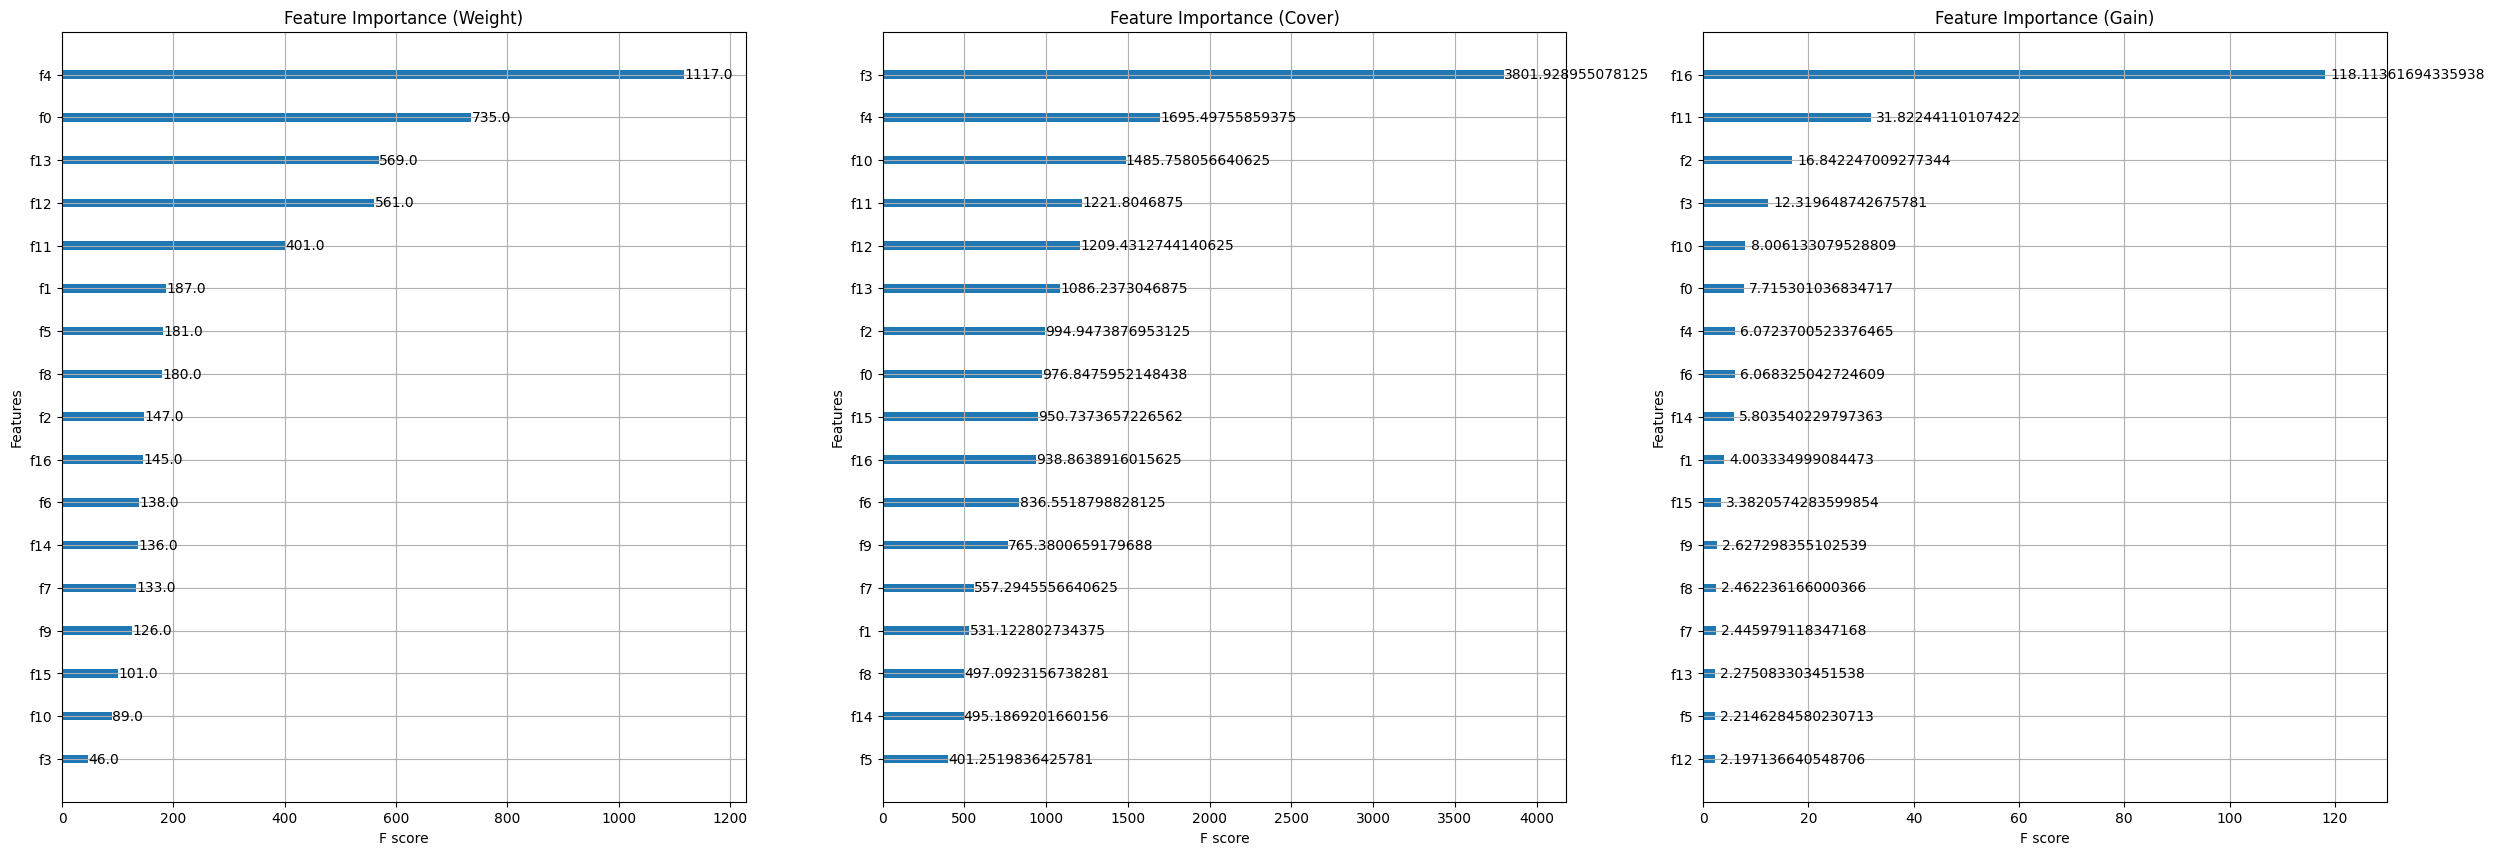

In [57]:
from xgboost import plot_importance

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

plot_importance((xgb_classifier), importance_type='weight', ax=axes[0])
axes[0].set_title('Feature Importance (Weight)')

plot_importance(xgb_classifier, importance_type='cover', ax=axes[1])
axes[1].set_title('Feature Importance (Cover)')

plot_importance(xgb_classifier, importance_type='gain', ax=axes[2])
axes[2].set_title('Feature Importance (Gain)')

plt.show()

¿Los resultados obtenidos con los diferentes métodos son compatibles? comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. 
> Los métodos no son compatibles, pues entregan relevancias distintas. Por ejemplo para 'Weight' muestar que f4 es la feature más importante, mientras que utilizando 'Cover' es la segunda más importante, y para 'Gain' no está ni en el top 3. 

> 'Weight' evalúa el número de veces que el feature aparece en un árbol dentro del conjunto de árboles (boosted) en e modelo. Por otro lado 'Cover' cuantifica la cantidad de observaciones (samples) relativas que incluyen al feature en los boosted trees. Finalmente, 'Gain' mide la mejora marginal el accuracy (o pérdida en la función de optimización) dada por una feature en la rama que se encuentra.

> Son medidas bastante distintas, esto explica la variación de la importancia. Cada una de las metodologías tiene utilidad dependiendo de la perspectiva en la que se coloque el usuario que modela. 

¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? 
> No, las importancias no son suficientes para explicar completamente el comportamiento del modelo. XGBoost es un  'modelo caja negra',  y por lo tanto jamás hay interpretabilidad completa. 

¿Qué debilidad presenta este método?
> Como cualquier modelo de árboles, tiende rápidamente al overfitting, sobre todo si hay poca data, o el modelo es muy complejo. Como mencionado anteriormente es difícil de interpretar debido a la naturaleza de caja negra inherente al modelo. Como cuenta con parámetros de inicialización (hiperparámetros), los resultados del modelo son sensibles a esa inicialización y estos deben ser ajustados para obtener resultados óptimos.

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [11]:
from sklearn.inspection import permutation_importance
clf = pipeline
data = df
result = permutation_importance(clf, 
                                X_test, 
                                y_test, 
                                n_repeats=30, 
                                random_state=42)

In [12]:
result

{'importances_mean': array([0.02764693, 0.00285027, 0.01130679, 0.00375085, 0.03305986,
        0.00075441, 0.00426008, 0.00077563, 0.00013674, 0.0006554 ,
        0.00434496, 0.05654101, 0.00163142, 0.00072377, 0.00369192,
        0.0015937 , 0.0157319 ]),
 'importances_std': array([0.0021241 , 0.00115049, 0.00156482, 0.00052973, 0.00218419,
        0.00056679, 0.00080717, 0.00060332, 0.00079242, 0.00077325,
        0.00077103, 0.00276211, 0.00109811, 0.00139095, 0.00100195,
        0.0006267 , 0.00143055]),
 'importances': array([[ 3.11195983e-02,  2.70881958e-02,  2.59565740e-02,
          2.68760167e-02,  3.11195983e-02,  3.16854092e-02,
          2.77247330e-02,  2.71589221e-02,  2.87856284e-02,
          2.48956786e-02,  2.82905439e-02,  2.39055096e-02,
          2.83612702e-02,  2.58858477e-02,  2.68760167e-02,
          2.92099866e-02,  2.98465238e-02,  2.60980267e-02,
          2.44005941e-02,  2.96343447e-02,  2.71589221e-02,
          2.43298677e-02,  2.77247330e-02,  3.0553

In [22]:
(result.importances_std.round(3))

array([0.002, 0.001, 0.002, 0.001, 0.002, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.003, 0.001, 0.001, 0.001, 0.001, 0.001])

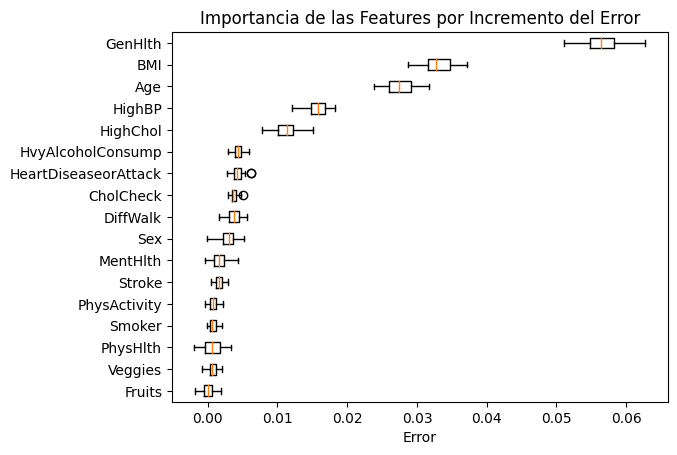

In [15]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(data.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

¿Cómo mide la importancia de las features su propuesta?
> Utiliza el incremento del error al predecir, luego de haber permutado valores en las features. 

¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
> Las cinco features con mayor impacto son "genHlth", "BMI", "Age", "highBP" y "HighChol", correspondients a información acerca de la salud general del paciente, su índice de masa corporal, su edad, si tiene presión sanguínea alta y si tiene colesterol alto. 

> La variable 'GenHlth' es difícil de comentar pues no se tiene mayor información, pero parece ser un puntaje asociado a que tan sano es el paciente. El índice de masa corporal puede indicar si el paciente padece de soprepeso u obesidad. La obesidad en particular es un precursor de la diabetes, se ha probado la causalidad. La diabetes tipo II tiende a aparecer en adultos mayores, por lo que tiene sentido que sea considerado como feature importante en el diagnóstico de diabetes. Lo mismo ocurre con la presión alta y el colesterol alto. Ambos son síntomas presentes en personas diabéticas y con alto riesgo de padecer diabetes, por lo que tiene sentido que el modelo haya elegido esas variables. 

¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
> Como han habido permutaciones de las features, los resultados se presentan como una alternativa mucho más robusta al experimento original, el cual esta limitado por haberse ejecutado en una sola instancia y sobre un solo conjunto de features. Los resultados son presentados a través de cajas de bigotes, las cuales revelan los estadísticos más importantes para cada feature. Por lo tanto podemos decir con mucha más seguridad que las features más importantes son las señaladas por este estudio. 

> Finalmente los resultados son congruentes con las inferencias llevadas a cabo por el médico que diagnostica (por ejemplo, mirar la salud general del paciente, si tiene sobrepeso, su edad, si tiene precursores a la diabetes como colesterol alto e hipertensión).

Nombre y explique 3 ventajas y 3 desventajas del método implementado.

#### Ventajas

    - Alta compresión de interpretabilidad global.
    - Comparable con diferentes modelos.
    - No necesita re-entrenar el modelo.

#### Desventajas

    - Enlazado al error del modelo.
    - Necesitas acceso a la gold label.
    - Si las features están correlacionadas puede generar sesgos por entradas poco realistas.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 38.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [10]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [3]:
# Inserte código para calcular shapley values aquí

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [4]:
# Inserte código para generar gráficos de aporte local aquí

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

In [5]:
# Inserte código para generar gráficos de aporte global aquí

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [6]:
# Inserte código para generar gráficos de feature vs shap value aquí

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [7]:
# Inserte código para generar gráficos PDP aquí

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [26]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [27]:
from alibi.explainers import AnchorTabular

2023-06-16 03:21:35.062920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 03:21:35.266905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-16 03:21:35.266966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-16 03:21:35.308521: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-16 03:21:38.061257: W tensorflow/stream_executor/platform/de

In [8]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>